In [1]:
from keras.datasets  import reuters

/root/.pyenv/versions/anaconda3-5.0.0/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
print(len(train_data))
print(len(test_data))
print(len(train_data[10]))

8982
2246
31


In [4]:
print(train_data)

[list([1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12])
 list([1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56, 3906, 1073, 81, 5, 1198, 57, 366, 737, 132, 20, 4093, 7, 2, 49, 2295, 2, 1037, 3267, 699, 3434, 8, 7, 10, 241, 16, 855, 129, 231, 783, 5, 4, 587, 2295, 2, 2, 775, 7, 48, 34, 191, 44, 35, 1795, 505, 17, 12])
 list([1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32, 818, 15, 14, 272, 26, 39, 684, 70, 11, 14, 12, 3886, 18, 180, 183, 187, 70, 11, 14, 102, 32, 11, 29, 53, 44, 704, 15, 14, 19, 758, 15, 53, 959, 47, 1013, 15, 14, 19, 132, 15, 39, 965, 32, 11, 14, 147, 72, 11, 180, 183, 187, 44, 11, 14, 102, 19, 11, 123, 186, 90, 67, 960, 4, 78, 13, 68, 467, 511, 110, 59, 89, 90, 67, 139

In [5]:
from keras.utils.np_utils import to_categorical 

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [6]:
print(one_hot_train_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [7]:
print(one_hot_test_labels)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
from keras import models
from keras import layers

In [9]:
model = models.Sequential()

In [10]:
model.add(layers.Dense(64, activation="relu", input_shape=(10000,)))

Instructions for updating:
Colocations handled automatically by placer.


In [11]:
model.add(layers.Dense(64, activation="relu"))
model.add(layers.Dense(46, activation="softmax"))

In [12]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])


In [13]:
import numpy as np 

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences): 
        results [i, sequence] = 1.
    return results
# Convert training data to vector
x_train = vectorize_sequences(train_data)
# Convert the test data to vector
x_test = vectorize_sequences(test_data)

In [14]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [20]:
history = model.fit(partial_x_train,
                                partial_y_train,
                                epochs  = 20,
                                batch_size = 512,
                                validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 155us/step - loss: 0.0867 - acc: 0.9579 - val_loss: 1.3440 - val_acc: 0.7730
Epoch 2/20
7982/7982 [==============================] - 1s 139us/step - loss: 0.0862 - acc: 0.9574 - val_loss: 1.3635 - val_acc: 0.7830
Epoch 3/20
7982/7982 [==============================] - 1s 145us/step - loss: 0.0833 - acc: 0.9592 - val_loss: 1.2785 - val_acc: 0.7960
Epoch 4/20
7982/7982 [==============================] - 1s 137us/step - loss: 0.0818 - acc: 0.9575 - val_loss: 1.3668 - val_acc: 0.7800
Epoch 5/20
7982/7982 [==============================] - 1s 144us/step - loss: 0.0834 - acc: 0.9587 - val_loss: 1.3479 - val_acc: 0.7870
Epoch 6/20
7982/7982 [==============================] - 1s 161us/step - loss: 0.0815 - acc: 0.9594 - val_loss: 1.2995 - val_acc: 0.7920
Epoch 7/20
7982/7982 [==============================] - 1s 138us/step - loss: 0.0808 - acc: 0.9579 - val_loss: 1.3433 - val_acc: 0.7990


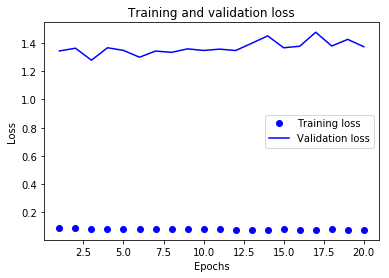

In [21]:
# Plot the loss value in training data and data varification   
import matplotlib.pyplot as plt

plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss'] 

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss,'bo', label='Training loss')
plt.plot(epochs, val_loss,'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

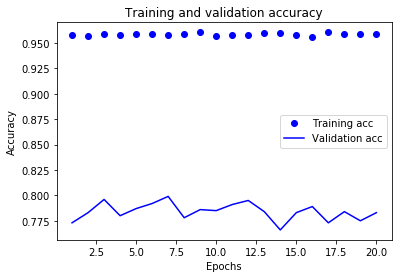

In [22]:
# Plot the accuracy rate in training data and data varification  

plt.figure()

acc = history.history['acc'] 
val_acc = history.history['val_acc'] 

plt.plot(epochs, acc,'bo', label='Training acc')
plt.plot(epochs, val_acc,'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend() 
plt.show()

In [23]:
model = models.Sequential() 

model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax')) 

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']) 

history = model.fit(partial_x_train,
                                partial_y_train,
                                epochs=8,
                                batch_size=512,
                                validation_data=(x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 2s 193us/step - loss: 2.8535 - acc: 0.4022 - val_loss: 1.9506 - val_acc: 0.6340
Epoch 2/8
7982/7982 [==============================] - 1s 133us/step - loss: 1.5744 - acc: 0.6898 - val_loss: 1.3817 - val_acc: 0.7110
Epoch 3/8
7982/7982 [==============================] - 1s 144us/step - loss: 1.1285 - acc: 0.7676 - val_loss: 1.1844 - val_acc: 0.7380
Epoch 4/8
7982/7982 [==============================] - 1s 140us/step - loss: 0.8771 - acc: 0.8225 - val_loss: 1.0465 - val_acc: 0.7800
Epoch 5/8
7982/7982 [==============================] - 1s 132us/step - loss: 0.6981 - acc: 0.8555 - val_loss: 0.9797 - val_acc: 0.8030
Epoch 6/8
7982/7982 [==============================] - 1s 136us/step - loss: 0.5540 - acc: 0.8900 - val_loss: 0.9437 - val_acc: 0.7980
Epoch 7/8
7982/7982 [==============================] - 1s 135us/step - loss: 0.4492 - acc: 0.9102 - val_loss: 0.9425 - val_acc: 0.8090
Epoch 8

In [24]:
print(results)

[0.9743816653002827, 0.7871772039711529]


In [25]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu')) 
model.add(layers.Dense(46, activation='softmax')) 

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy']) 

history = model.fit(partial_x_train,
                                partial_y_train,
                                epochs=20,
                                batch_size=128,
                                validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 223us/step - loss: 2.8698 - acc: 0.2400 - val_loss: 2.2536 - val_acc: 0.2740
Epoch 2/20
7982/7982 [==============================] - 1s 166us/step - loss: 1.9568 - acc: 0.5643 - val_loss: 1.7821 - val_acc: 0.6290
Epoch 3/20
7982/7982 [==============================] - 1s 178us/step - loss: 1.6348 - acc: 0.6426 - val_loss: 1.6428 - val_acc: 0.6290
Epoch 4/20
7982/7982 [==============================] - 1s 177us/step - loss: 1.4962 - acc: 0.6531 - val_loss: 1.6087 - val_acc: 0.6270
Epoch 5/20
7982/7982 [==============================] - 1s 174us/step - loss: 1.4120 - acc: 0.6586 - val_loss: 1.5884 - val_acc: 0.6340
Epoch 6/20
7982/7982 [==============================] - 1s 183us/step - loss: 1.3484 - acc: 0.6641 - val_loss: 1.5714 - val_acc: 0.6420
Epoch 7/20
7982/7982 [==============================] - 2s 197us/step - loss: 1.2929 - acc: 0.6635 - val_loss: 1.5870 - val_acc: 0.6350


In [ ]:
results = model.evaluate(x_test, one_hot_test_labels)